In [9]:
import pandas as pd

In [12]:
df = pd.read_csv('lesson3data.csv', encoding='windows-1251')

In [13]:
df.head()


,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,id_fam,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,10107064,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,10107064,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,10107064,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,10107064,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,10107064,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [ ]:
#задача-найти наиболее часто и постоянно покупающих покупателей опр.бренда, что бы выдать им скидочные карты по этому бренду
# нужные колонки-tc (это id пользователя) и art_sp (это название бренда). ОТБЕРЕМ НУЖНЫЕ КОЛОНКИ:
user_df = df[['tc','art_sp']]
user_df.head()

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [ ]:
#ГОТОВИМ ДАННЫЕ ДЛЯ УДОБНОЙ РАБОТЫ
# ПЕРЕИМЕНУЕМ КОЛОНКИ:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [ ]:
# ВИДИМ, ЧТО В brand_info НАЗВАНИЯ ПРОДУКЦИИ И БРЕНДА => НУЖНО ДОСТАТЬ ТОЛЬКО НАЗВАНИЕ БРЕНДА!


In [ ]:
#ИЩЕМ МЕТОДЫ. Строку можно разделить split('по какому разделителю')
brend_name = 'MARAVILLA 500 G Store_Brand'.split(' ')
brend_name #получили список строк. Теперь можно обращаться по номерам элементов,начиная с нуля!
brend_name

['MARAVILLA', '500', 'G', 'Store_Brand']

In [ ]:
brend_name[3] #смогли вытащить название бренда из всей строки

'Store_Brand'

In [ ]:
brend_name[-1] #знаем,что нужная инф-ция в конце, удобнее обратиться к -1му элементу

'Store_Brand'

In [ ]:
user_df['brand_info']

0        MARAVILLA        500 G Store_Brand
1        FIDEO CABELLIN   500 G Store_Brand
2              SPAGUETTI Nє 5 500 G Brand_1
3             FIDEO FIDEUБ      500 Brand_7
4            MACARRONES  GRATINAR 5 Brand_2
                        ...                
48124        FIDEOS 0         500 G Brand_4
48125        PLUMAS 3         500 G Brand_4
48126    MACARRONES       500 G Store_Brand
48127    SPAGHETTI        500 G Store_Brand
48128    SPAGHETTINI      500 G Store_Brand
Name: brand_info, Length: 48129, dtype: object

In [ ]:
#нужно трансформировать строки с названиями брендов по всей таблице.Метод APPLY(ПРИМЕНИТЬ)-нужно применить SPLIT ко всему столбцу
# создадим функцию,которая разделит строки всей таблицы и вернет только название бренда
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]
  


In [ ]:
# передаем функцию в метод APPLY
user_df['brand_info'].apply(split_brand)

0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
            ...     
48124        Brand_4
48125        Brand_4
48126    Store_Brand
48127    Store_Brand
48128    Store_Brand
Name: brand_info, Length: 48129, dtype: object

In [ ]:
#Данные созданы,но в таблицу не выводятся => создадим для них колонку
user_df['brand_name'] = user_df['brand_info'].apply(split_brand)

In [ ]:
user_df

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


In [ ]:
# Вместо написания функции через DEF можно использовать лямбда-функции:
user_df['brand_name'] = user_df['brand_info'].apply(lambda x: x.split(' ')[-1])
user_df['brand_name']

0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
            ...     
48124        Brand_4
48125        Brand_4
48126    Store_Brand
48127    Store_Brand
48128    Store_Brand
Name: brand_name, Length: 48129, dtype: object

In [ ]:
#задача-найти наиболее часто и постоянно покупающих покупателей опр.бренда, что бы выдать им скидочные карты по этому бренду.
#Начинаем поиск

In [ ]:
users_purchases = user_df.groupby('user_id', as_index=False).agg({'brand_name': 'count'}) 
#as_index=False - чтобы user_id не стал индексом строк,а остался столбцом)

In [ ]:
users_purchases = users_purchases.rename(columns={'brand_name': 'purchases'})
users_purchases
#переименовали,т.к. теперь колонка показывает кол-во покупок,а не имя бренда

,user_id,purchases
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2
...,...,...
11759,1408817589,3
11760,1408825059,1
11761,1408832719,3
11762,1408840919,1


In [ ]:
# посмотрим среднее значение покупок 
users_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [ ]:
#Видим,что 75%=5. Это значит,что после 50% еще 25% совершили больше 5 покупок,будем смотреть на них.Сделаем запрос query по усл.
users_purchases = users_purchases.rename(columns={'brand_name': 'purchases'}).query('purchases >=5')
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [ ]:
users_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [ ]:
#нужно понять например польз-ль 1031 совершил 6 покуп 1бренда или разных? Сгруппируем наши нач.данные
user_df.groupby(['user_id','brand_name'], as_index=False).agg({'brand_info': 'count'})


,user_id,brand_name,brand_info
0,-1236394515,Brand_4,1
1,1031,Brand_3,1
2,1031,Store_Brand,5
3,4241,Brand_4,3
4,4241,Store_Brand,2
...,...,...,...
18183,1408817589,Store_Brand,2
18184,1408825059,Brand_1,1
18185,1408832719,Brand_4,3
18186,1408840919,Store_Brand,1


In [ ]:
#сделаем запрос конкретно по пользователю 1031
user_df.groupby(['user_id','brand_name'], as_index=False).agg({'brand_info': 'count'}).query('user_id==1031')

,user_id,brand_name,brand_info
1,1031,Brand_3,1
2,1031,Store_Brand,5


In [ ]:
#теперь нужно для КАЖДОГО польз-ля найти любимый бренд. Найдем процент покупок,кот.приход.на любимый бренд
# установим для себя такой вес в размее 70% от всех покупок
user_df.groupby(['user_id','brand_name'], as_index=False).agg({'brand_info': 'count'})\
.sort_values(['user_id','brand_info'],ascending=[False,False])\
.groupby('user_id').head(1)\
.rename(columns={'brand_name':'lovely_brand','brand_info':'lovely_brand_purchases'})
#метод head после groupby вернет 1ю строку каждой группы

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [ ]:
lovely_brand_purchases_df=user_df.groupby(['user_id','brand_name'], as_index=False).agg({'brand_info': 'count'})\
.sort_values(['user_id','brand_info'],ascending=[False,False])\
.groupby('user_id').head(1)\
.rename(columns={'brand_name':'lovely_brand','brand_info':'lovely_brand_purchases'})

In [ ]:
#посчитаем сколько уникальных брендов купил каждый пользователь
users_unique_brands = user_df.groupby('user_id',as_index=False).agg({'brand_name': pd.Series.nunique})\
.rename(columns={'brand_name':'unique_brands'})
#pd.Series.nunique для подсчета уник.брендов.Каждая колонка df это pd.Series-мини список!  


In [ ]:
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [ ]:
lovely_brand_purchases_df


,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [ ]:
#Вызовем df которые мы создали для анализа
users_purchases #Здесь отбирали сколько каждый покупал и отобрали больше 5

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5
...,...,...
11740,1408767189,5
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [ ]:
#Вызовем df которые мы создали для анализа
users_unique_brands #Здесь для каждого пользователя считали число уникальных брендов 

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [ ]:
#Вызовем df которые мы создали для анализа
lovely_brand_purchases_df #Здесь для каждого пользователя посчитали сколько покупок приходится на любимый бренд

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [ ]:
# Теперь эти три df надо объединить в один-метод MERGE
loyality_df=users_purchases.merge(users_unique_brands, on='user_id').merge(lovely_brand_purchases_df,on='user_id')
loyality_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [ ]:
loyality_df[loyality_df.unique_brands==1] #Посмотрим тех,кто покупает только 1 бренд. Это самые лояльные пользователи.

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [ ]:
loyal_users=loyality_df[loyality_df.unique_brands==1]

In [ ]:
#Но есть пользователи,которые покупают несколько брендов (например польз-ль 40911). Надо определить метрику отнесения таких 
#покупателей к лояльным


In [ ]:
# Какая доля всех покупок пришлась на любимый бренд? Заведем новую колонку-балл лояльности
loyality_df['loyality_score']=loyality_df.lovely_brand_purchases / loyality_df.purchases

In [ ]:
loyality_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyality_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


In [ ]:
# На графике посмотим как пользователи размещаются по лояльности,чтобы определиться со средним значением метрики
import seaborn as sns #наиболее простая библиотека
import matplotlib.pyplot as plt #для более сложных графиков
%matplotlib inline #так графики будут сразу рисоваться

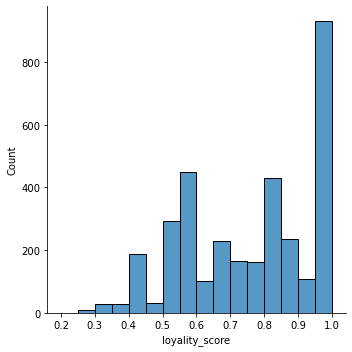

In [ ]:
sns.displot(loyality_df.loyality_score) #аргумент-столбец (серия) который хотим визуализировать для анализа

In [ ]:
#Сгруппируем пользователей по медиане баллов лояльности и посчитаем их кол-во с такими сред.баллами 
loyality_df.groupby('lovely_brand',as_index=False).agg({'loyality_score':'median','user_id':'count'})

,lovely_brand,loyality_score,user_id
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
2,Brand_3,0.500000,115
3,Brand_4,0.818182,2041
4,Brand_5,0.600000,5
5,Brand_7,0.444444,9
6,Store_Brand,0.750000,715


In [ ]:
brand_loyality=loyality_df.groupby('lovely_brand',as_index=False).agg({'loyality_score':'median','user_id':'count'})

<AxesSubplot:xlabel='lovely_brand', ylabel='loyality_score'>

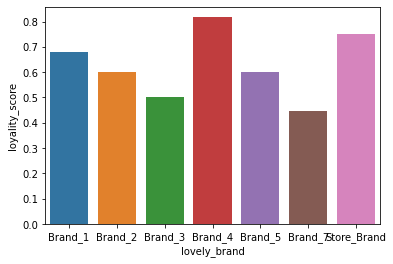

In [ ]:
sns.barplot(x='lovely_brand',y='loyality_score',data=brand_loyality)

In [ ]:
Таким образом, были найдены наиболее лояльные пользователи по каждому бренду